### Predicting the future sales of a product based on the amount spent on different types of advertisements

The aim of this project is to predict the future sales of a product based on the amount spent on different types of advertisements.

Let’s assume we have a company’s data, where there is the amount spent on different types of advertisements and its sales. Predicting the future sales of a product helps a company manage the manufacturing and advertising cost of the product. In this project, we are going to build inear regression models (simple and multivariate linear regression models) in python using: pandas, numpy, sklearn, seaborn, matplotlib, scatter plot and plotly.

The sample dataset, which we’ll be using in this article can be downloaded from here: https://github.com/JeanGermain/Data_Science_Projects/blob/main/Machine_Learning_Projects/Predicting_the_future_sales_of_a_product/Company_Advertising_Data.csv

#### Simple Linear Regression:
To predict the relationship between two variables, we’ll use a simple linear regression model. In a simple linear regression model, we’ll predict the outcome of a variable known as the dependent variable using only one independent variable.

#### Multivariate Linear Regression:
As the name implies, multivariate regression is a technique that estimates an output based on multiple input variables.

Below is the description of all the columns in the dataset:

1.TV: Advertising cost spent in dollars for advertising on TV.

2.Radio: Advertising cost spent in dollars for advertising on Radio.

3.Newspaper: Advertising cost spent in dollars for advertising on Newspaper.

4.Sales: Number of units sold.

So, in the above dataset, the sales of the product depend on the advertisement cost of the product.

#### Future Sales Prediction using Python
Let’s start the task of future sales prediction with machine learning by importing the necessary Python libraries and the dataset:

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("Company_Advertising_Data.csv")
print(data.head())  # print the first 5 rows of our dataframe

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [6]:
# Number of (rows,columns) in our dataframe:
data.shape

(200, 4)

In [7]:
# Let’s have a look at whether this dataset contains any null values or not:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


So this dataset doesn’t have any null values. 

In [11]:
# Now let’s visualize the relationship between the amount spent on advertising on TV and units sold:
import plotly.express as px
import plotly.graph_objects as go

figure = px.scatter(data_frame = data, x="TV",
                    y="Sales", size="Sales", trendline="ols") # OLS is actually Ordinary Least Squares regression so it just fits a linear regression line.
figure.show()

In [12]:
# Now let’s visualize the relationship between the amount spent on advertising on newspapers and units sold:
figure = px.scatter(data_frame = data, x="Newspaper",
                    y="Sales", size="Sales", trendline="ols")  
figure.show()

In [13]:
# Now let’s visualize the relationship between the amount spent on advertising on radio and units sold:
#figure = px.scatter(data_frame = data, x="Sales",
#                    y="Radio", size="Radio", trendline="ols")
figure = px.scatter(data_frame = data, x="Radio",
                    y="Sales", size="Sales", trendline="ols")
figure.show()

From the 3 graphs above, the TV column seems most correlated to Sales. If we cannot determine the correlation using a scatter plot, we can either use the seaborn heatmap to visualize the data or use corr() function:

In [14]:
# Correlation using corr() function:
correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


As we can see, the TV column is the most correlated column to Sales.

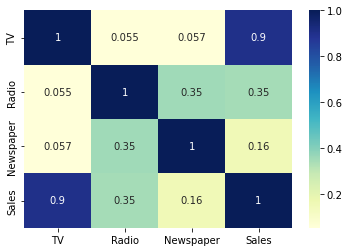

In [17]:
# Correlation using heatmap
import matplotlib.pyplot as plt 
import seaborn as sns
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Future Sales Prediction Multiple Linear Regression Model

Now in this section, I will train a machine learning model to predict the future sales of a product.

In [20]:
# Before I train the model, let’s split the data into training and test sets:
x = np.array(data.drop(["Sales"], 1))  # x = only inputs [TV,Newspaper, Radio]. So let's drop the output [Sales]
y = np.array(data["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)
# Infos: train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result. 
#In practice I would say, you should set the random_state to some fixed number while you test stuff, but then remove it in production if you really need a random (and not a fixed) split.

C:\Users\djger\AppData\Local\Temp\ipykernel_25260\499871129.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [21]:
# Now let’s train the model to predict future sales:
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9059011844150826


The score of our prediction model is 90.5%

In [77]:
# Now let's calculate the intercept and coefficients (i.e slope) of our model:
b0=model.intercept_  # b0=intercept of line
print ("Intercept: = b0 = ", model.intercept_)
print ("Coefficients:[b1, b2, b3] = ", model.coef_)
b0=model.intercept_  # b0=intercept of line
[b0,b1,b3]=model.coef_  # b0,b1,b2 =coefficients
print([b1,b2,b3])

Intercept: = b0 =  4.714126402214134
Coefficients:[b1, b2, b3] =  [0.05450927 0.10094536 0.00433665]
[0.10094536239295575, 0.004336646822034021, 0.004336646822034021]


#### Infos:
1. Calculating values of intercept & coefficients is not a compulsory step to build our model. We can calculate them or not.  

2. Simple linear regression model: y= ax +b  with y= output/predicted value, a =coef (slope) of input feature and b =intercept of line. Our simple linear regression model can be of the form: Sales = aTV + b or Sales = aRadio + b or Sales = aNewspaper + b. 

3. Multiple linear regression model: y= b0 + b1x1 +b2x2 +....bnxn with: y= output/predicted value, b0=intercept of line, b1,b2...bn= coef of input features and x1,x2...xn = input features. Our multiple linear regression model can be of the form: Sales = b0 + b1TV + b2Radio +b3Newspaper

Now let’s input values into the model according to the features we have used to train it and predict how many units of the product can be sold based on the amount spent on its advertising on various platforms:

In [23]:
#input_features = [[TV, Radio, Newspaper]]
input_features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(input_features))

[21.37254028]


So, if the company spends 230.1 dollars on advertising on TV, and 37.8 dollars on advertising on radio and 69.2 dollars on advertising in newspaper, then it will sell 21.37 units. So for inputs [230.1, 37.8, 69.2], the number of units predicted by our model (21.37 units) is very close to the actual number of units sold as given in the dataset (22.1 units) => see first row in the dataframe below:

In [25]:
print(data.head(2))  # print the first 2 rows of our dataframe

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4


### Simple Linear Regression Model

Now in this section, I will train a machine learning model to predict the future sales of a product based on TV advertising cost. Since the TV column is the most correlated column to Sales, we can therefore use a simple linear regression model to predict the number of units which the company will sell based on TV advertising cost only.

In [101]:
# Let’s split the data into training and test sets:
x = np.array(data.drop(["Sales","Radio","Newspaper"], 1))  # x = only 1 input variable (TV). So let's drop columns: [Sales,Newspaper, Radio]
#print(x)
y = np.array(data["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

C:\Users\djger\AppData\Local\Temp\ipykernel_25260\4033883107.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [90]:
# Let’s train the model to predict future sales:
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.802561303423698


Now let’s input value into the model according to the feature we have used to train it and predict how many units of the product can be sold based on the amount spent on its TV advertising:

In [91]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1]])
print(model.predict(features))

[19.77373383]


As we can se from the line of code above, if the company spends 230.1 dollars on TV advertisement, then it can expect 19.77 units to be sold.

####  Visualizing the regression line:

Intercept: = b =  7.007108428241851
Coefficient: = a =  [0.05548294]


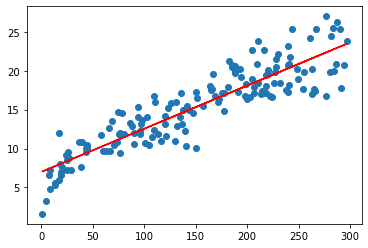

In [103]:
plt.scatter(xtrain, ytrain)
# Now let's calculate the intercept and coefficients (i.e slope) of our model:
print ("Intercept: = b = ", model.intercept_)
print ("Coefficient: = a = ", model.coef_)
b=model.intercept_  # b=intercept of line
a=model.coef_  # a =coefficients
plt.plot(xtrain, a*xtrain + b, 'r')   # y=ax+b <=> sales =a*TV+b <=> Sales = 7.007108428241851 + 0.05548294 * TV
plt.show()

### Summary
So this is how we can train a machine learning model to predict the future sales of a product. Predicting the future sales of a product helps a company manage the manufacturing and advertising cost of the product.